# Mini poject by Ludvig Flodin - ludflo-0

In this project I will try ## on five datasets (Iris, Wine, Breast cancer, Madelon, Gas sensor array drift at different concentrations)


Average accuracy SOM = 

## TODO

Fix data imbalance car eval

Try arrythmia using smote

# Data

## Load Iris (150 instances, 4 features)

Three different iris classes

In [47]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
data, labels = iris.data, iris.target

print(labels.value_counts())
data = np.array(data)
labels = np.array(labels)
iris_x_train, X_temp, iris_y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42)
iris_x_val, iris_x_test, iris_y_val, iris_y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

print(iris_x_train.shape)
print(iris_x_test.shape)


target
0    50
1    50
2    50
Name: count, dtype: int64
(120, 4)
(15, 4)


In [48]:
sample = 120
iris_x_train = iris_x_train.reshape(iris_x_train.shape[0],4).astype(float)[:sample,:]
iris_y_train = np.array(iris_y_train.astype(int)[:sample])

sample = 30
iris_x_test = iris_x_test.reshape(iris_x_test.shape[0],4).astype(float)[:sample,:]
iris_y_test = np.array(iris_y_test.astype(int)[:sample])

## Load Wine (178 instances, 13 features)

The classes are three wine regions

In [3]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine = load_wine(as_frame = True)
data, labels = wine.data, wine.target
print(labels.value_counts())

data = np.array(data)
labels = np.array(labels)

wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
wine_x_train = wine_x_train.reshape(wine_x_train.shape[0],13).astype(float)
wine_y_train = np.array(wine_y_train.astype(int))
wine_x_test = wine_x_test.reshape(wine_x_test.shape[0],13).astype(float)
wine_y_test = np.array(wine_y_test.astype(int))

target
1    71
0    59
2    48
Name: count, dtype: int64


## Load breast cancer (569 instances, 30 features)

Binary classification i guess

In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

cancer = load_breast_cancer(as_frame = True)
data, labels = cancer.data, cancer.target
print(labels.value_counts())
print(data.shape)
data = np.array(data)
labels = np.array(labels)



target
1    357
0    212
Name: count, dtype: int64
(569, 30)


In [7]:
cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
cancer_x_train = cancer_x_train.reshape(cancer_x_train.shape[0],30).astype(float)
cancer_y_train = np.array(cancer_y_train.astype(int))
cancer_x_test = cancer_x_test.reshape(cancer_x_test.shape[0],30).astype(float)
cancer_y_test = np.array(cancer_y_test.astype(int))

## Load car eval (1728 instances, 6 features)


evaulation level (unacceptable, acceptable, good, very good)

In [33]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 

data = car_evaluation.data.features
labels = car_evaluation.data.targets

data_encoded = data.copy()
label_encoders = {} 

# encode str to 
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data[col])
        label_encoders[col] = le 

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

data_encoded = np.array(data_encoded)
labels_encoded = np.array(labels_encoded)

print(labels.value_counts())
print(data.shape)
data = np.array(data)
labels = np.array(labels)


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
(1728, 6)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
car_x_train, car_x_test, car_y_train, car_y_test = train_test_split(data_encoded, labels_encoded, test_size=0.2, random_state=1)
car_x_train = car_x_train.reshape(car_x_train.shape[0],6).astype(float)
car_y_train = np.array(car_y_train.astype(int))
car_x_test = car_x_test.reshape(car_x_test.shape[0],6).astype(float)
car_y_test = np.array(car_y_test.astype(int))

## Load arrhythmia (452 instances, 262 features)

Heavily imbalanced dataset

In [55]:
import numpy as np
import pandas as pd

arrythmia_path = '/Users/ludvigflodin/Documents/Courses/D7041E/Mini project/arrhythmia/arrhythmia.data'
arr_df = pd.read_csv(arrythmia_path,sep=',',header=None)
arr_df.rename(columns={arr_df.columns[-1]: "class"}, inplace=True)
print(arr_df.head())

labels = arr_df['class']
data = arr_df[range(0,279)]
print(labels.value_counts())
print(data.shape)

# fix missing values and insert median
data.replace("?", np.nan, inplace=True)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())



    0  1    2   3    4    5    6    7    8   9  ...  270   271  272  273  274  \
0  75  0  190  80   91  193  371  174  121 -16  ...  0.0   9.0 -0.9  0.0  0.0   
1  56  1  165  64   81  174  401  149   39  25  ...  0.0   8.5  0.0  0.0  0.0   
2  54  0  172  95  138  163  386  185  102  96  ...  0.0   9.5 -2.4  0.0  0.0   
3  55  0  175  94  100  202  380  179  143  28  ...  0.0  12.2 -2.2  0.0  0.0   
4  75  0  190  80   88  181  360  177  103 -16  ...  0.0  13.1 -3.6  0.0  0.0   

   275  276   277   278  class  
0  0.9  2.9  23.3  49.4      8  
1  0.2  2.1  20.4  38.8      6  
2  0.3  3.4  12.3  49.0     10  
3  0.4  2.6  34.6  61.6      1  
4 -0.1  3.9  25.4  62.8      7  

[5 rows x 280 columns]
class
1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: count, dtype: int64
(452, 279)


/var/folders/v6/pl0_dkns3pdd4gyq5whvz4nr0000gn/T/ipykernel_69391/1400647156.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("?", np.nan, inplace=True)
/var/folders/v6/pl0_dkns3pdd4gyq5whvz4nr0000gn/T/ipykernel_69391/1400647156.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].median())


In [12]:
data = np.array(data)
labels = np.array(labels)

arr_x_train, arr_x_test, arr_y_train, arr_y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
arr_x_train = arr_x_train.reshape(arr_x_train.shape[0],arr_x_train.shape[1]).astype(float)
arr_y_train = np.array(arr_y_train.astype(int))
arr_x_test = arr_x_test.reshape(arr_x_test.shape[0],arr_x_train.shape[1]).astype(float)
arr_y_test = np.array(arr_y_test.astype(int))

GPT implementation of SMOTE and undersampling

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Ladda datasetet
arrythmia_path = '/Users/ludvigflodin/Documents/Courses/D7041E/Mini project/arrhythmia/arrhythmia.data'
arr_df = pd.read_csv(arrythmia_path, sep=',', header=None)
arr_df.rename(columns={arr_df.columns[-1]: "class"}, inplace=True)

# Hantera saknade värden och använd median
data = arr_df.iloc[:, :-1]
labels = arr_df['class']
# Ersätt "?" med NaN
data.replace("?", np.nan, inplace=True)

# Omvandla alla kolumner till numeriska om möjligt
data = data.apply(pd.to_numeric, errors='coerce')

# Fyll NaN med median för varje kolumn
for col in data.columns:
    if data[col].isnull().any():  # Kontrollera om det finns NaN i kolumnen
        data[col].fillna(data[col].median(), inplace=True)

# Konvertera till numpy-arrayer
data = np.array(data).astype(float)
labels = np.array(labels).astype(int)

# Dela upp i träning och test
arr_x_train, arr_x_test, arr_y_train, arr_y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
x_train_under, y_train_under = undersampler.fit_resample(arr_x_train, arr_y_train)

# SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
arr_x_train_smote, arr_y_train_smote = smote.fit_resample(arr_x_train, arr_y_train)

# Kontrollera balansen efter varje steg
print("Original Data Class Distribution:")
print(pd.Series(arr_y_train).value_counts())
print("\nAfter Undersampling:")
print(pd.Series(y_train_under).value_counts())
print("\nAfter SMOTE:")
print(pd.Series(arr_y_train_smote).value_counts())



/var/folders/v6/pl0_dkns3pdd4gyq5whvz4nr0000gn/T/ipykernel_69391/1656357054.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or dead

Original Data Class Distribution:
1     193
10     40
2      36
6      22
16     16
4      14
5      11
3      11
9       7
15      5
8       2
14      2
7       2
Name: count, dtype: int64

After Undersampling:
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
14    2
15    2
16    2
Name: count, dtype: int64

After SMOTE:
6     193
1     193
10    193
5     193
9     193
3     193
2     193
16    193
4     193
15    193
8     193
14    193
7     193
Name: count, dtype: int64


In [38]:
print("\nAfter SMOTE:")
print(pd.Series(arr_y_train_smote).value_counts())


After SMOTE:
6     193
1     193
10    193
5     193
9     193
3     193
2     193
16    193
4     193
15    193
8     193
14    193
7     193
Name: count, dtype: int64


# Models

## ANN MLP

### Import and functions

In [34]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    best_val_loss = 1000
    best_model = model
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            if device == "cuda:0":loss = loss.cuda()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        
        train_loss /= len(train_loader.dataset)
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
            
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_loader.dataset)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        
        # Save the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model
    return best_model

### Runs

#### Iris

In [42]:
import torch
import torch.nn as nn
import optuna
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = nn.Sequential(
nn.Linear(4,100),
nn.ReLU(),
nn.Linear(100, 100),
nn.Sigmoid(),
nn.Linear(100,3),
)

BATCH_SIZE = 20
LEARNING_RATE = 0.001
EPOCHS = 70
WEIGHT_DECAY = 1e-5
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# convert numpy arrays to torch dataloader
train_loader = DataLoader(TensorDataset(torch.FloatTensor(iris_x_train),torch.LongTensor(iris_y_train)),batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(TensorDataset(torch.FloatTensor(iris_x_val),torch.LongTensor(iris_y_val)),batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(torch.FloatTensor(iris_x_test),torch.LongTensor(iris_y_test)),batch_size=BATCH_SIZE, shuffle=True)
iris_mlp = train_model( model,
                        loss_function,
                        optimizer,
                        train_loader,
                        val_loader,
                        EPOCHS)


Epoch 10/70, Train Loss: 0.5290, Val Loss: 0.4954
Epoch 20/70, Train Loss: 0.3177, Val Loss: 0.3427
Epoch 30/70, Train Loss: 0.1910, Val Loss: 0.1924
Epoch 40/70, Train Loss: 0.1276, Val Loss: 0.1348
Epoch 50/70, Train Loss: 0.1017, Val Loss: 0.1311
Epoch 60/70, Train Loss: 0.0869, Val Loss: 0.1071
Epoch 70/70, Train Loss: 0.0822, Val Loss: 0.1080


In [43]:
iris_mlp.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = iris_mlp(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total



In [41]:
import torch
import torch.nn as nn
import optuna
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 20
LEARNING_RATE = 0.001
EPOCHS = 70


def objective(trial):

    model = nn.Sequential(
    nn.Linear(4,100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.Sigmoid(),
    nn.Linear(100,3),
)

    BATCH_SIZE = trial.suggest_int("BATCH SIZE", 5, 50)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    EPOCHS = trial.suggest_int("EPOCHS", 10, 100)
    WEIGHT_DECAY = trial.suggest_float("WEIGHT_DECAY",1e-5, 1e-3, log=True)

    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

    # convert numpy arrays to torch dataloader
    train_loader = DataLoader(TensorDataset(torch.FloatTensor(iris_x_train),torch.LongTensor(iris_y_train)),batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(TensorDataset(torch.FloatTensor(iris_x_val),torch.LongTensor(iris_y_val)),batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(TensorDataset(torch.FloatTensor(iris_x_test),torch.LongTensor(iris_y_test)),batch_size=BATCH_SIZE, shuffle=True)
    iris_mlp = train_model( model,
                            loss_function,
                            optimizer,
                            train_loader,
                            val_loader,
                            EPOCHS)
    
    iris_mlp.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = iris_mlp(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy 
    
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
    
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)
    

[I 2025-01-03 17:17:36,255] A new study created in memory with name: no-name-30d4297f-f4a3-4cf5-8f99-a240d19dd2a4


Epoch 10/44, Train Loss: 0.1896, Val Loss: 0.2238
Epoch 20/44, Train Loss: 0.0859, Val Loss: 0.0663
Epoch 30/44, Train Loss: 0.0700, Val Loss: 0.1275


[I 2025-01-03 17:17:36,633] Trial 0 finished with value: 1.0 and parameters: {'BATCH SIZE': 36, 'LEARNING_RATE': 0.006801690523527771, 'EPOCHS': 44, 'WEIGHT_DECAY': 5.0553410136151856e-05}. Best is trial 0 with value: 1.0.


Epoch 40/44, Train Loss: 0.0952, Val Loss: 0.0695
Epoch 10/78, Train Loss: 1.0166, Val Loss: 0.9930
Epoch 20/78, Train Loss: 0.9088, Val Loss: 0.8769
Epoch 30/78, Train Loss: 0.7868, Val Loss: 0.7498
Epoch 40/78, Train Loss: 0.6701, Val Loss: 0.6545
Epoch 50/78, Train Loss: 0.5753, Val Loss: 0.5665
Epoch 60/78, Train Loss: 0.5065, Val Loss: 0.4950


[I 2025-01-03 17:17:37,373] Trial 1 finished with value: 1.0 and parameters: {'BATCH SIZE': 29, 'LEARNING_RATE': 0.00021545383253923078, 'EPOCHS': 78, 'WEIGHT_DECAY': 0.0005555366717204152}. Best is trial 0 with value: 1.0.


Epoch 70/78, Train Loss: 0.4536, Val Loss: 0.4573
Epoch 10/76, Train Loss: 0.9817, Val Loss: 0.9705
Epoch 20/76, Train Loss: 0.8525, Val Loss: 0.8377
Epoch 30/76, Train Loss: 0.7180, Val Loss: 0.6979
Epoch 40/76, Train Loss: 0.6112, Val Loss: 0.5984
Epoch 50/76, Train Loss: 0.5380, Val Loss: 0.5308
Epoch 60/76, Train Loss: 0.4862, Val Loss: 0.4847


[I 2025-01-03 17:17:38,275] Trial 2 finished with value: 1.0 and parameters: {'BATCH SIZE': 15, 'LEARNING_RATE': 0.00013215893533436742, 'EPOCHS': 76, 'WEIGHT_DECAY': 3.103970793742392e-05}. Best is trial 0 with value: 1.0.


Epoch 70/76, Train Loss: 0.4441, Val Loss: 0.4453
Epoch 10/41, Train Loss: 0.9677, Val Loss: 0.9534
Epoch 20/41, Train Loss: 0.7888, Val Loss: 0.7620


[I 2025-01-03 17:17:39,030] Trial 3 finished with value: 1.0 and parameters: {'BATCH SIZE': 8, 'LEARNING_RATE': 0.0001404073855083217, 'EPOCHS': 41, 'WEIGHT_DECAY': 0.0002672733592214505}. Best is trial 0 with value: 1.0.


Epoch 30/41, Train Loss: 0.6193, Val Loss: 0.5978
Epoch 40/41, Train Loss: 0.5085, Val Loss: 0.5060


[I 2025-01-03 17:17:39,257] Trial 4 finished with value: 0.9333333333333333 and parameters: {'BATCH SIZE': 26, 'LEARNING_RATE': 0.004817782502710865, 'EPOCHS': 31, 'WEIGHT_DECAY': 2.103248017002711e-05}. Best is trial 0 with value: 1.0.


Epoch 10/31, Train Loss: 0.1791, Val Loss: 0.2198
Epoch 20/31, Train Loss: 0.1442, Val Loss: 0.1297
Epoch 30/31, Train Loss: 0.0769, Val Loss: 0.2509
Epoch 10/78, Train Loss: 0.1208, Val Loss: 0.0691
Epoch 20/78, Train Loss: 0.1075, Val Loss: 0.0429
Epoch 30/78, Train Loss: 0.1006, Val Loss: 0.1171
Epoch 40/78, Train Loss: 0.0827, Val Loss: 0.0267
Epoch 50/78, Train Loss: 0.0686, Val Loss: 0.0238
Epoch 60/78, Train Loss: 0.1108, Val Loss: 0.0862
Epoch 70/78, Train Loss: 0.0823, Val Loss: 0.0339


[I 2025-01-03 17:17:41,161] Trial 5 finished with value: 0.9333333333333333 and parameters: {'BATCH SIZE': 6, 'LEARNING_RATE': 0.0088378666012493, 'EPOCHS': 78, 'WEIGHT_DECAY': 1.29393530894525e-05}. Best is trial 0 with value: 1.0.


Epoch 10/97, Train Loss: 0.1056, Val Loss: 0.5663
Epoch 20/97, Train Loss: 0.0736, Val Loss: 0.0698
Epoch 30/97, Train Loss: 0.0652, Val Loss: 0.1399
Epoch 40/97, Train Loss: 0.0900, Val Loss: 0.0841
Epoch 50/97, Train Loss: 0.0694, Val Loss: 0.0342
Epoch 60/97, Train Loss: 0.0599, Val Loss: 0.0355
Epoch 70/97, Train Loss: 0.1877, Val Loss: 0.0338
Epoch 80/97, Train Loss: 0.0667, Val Loss: 0.0654


[I 2025-01-03 17:17:42,037] Trial 6 finished with value: 1.0 and parameters: {'BATCH SIZE': 23, 'LEARNING_RATE': 0.009252731321548182, 'EPOCHS': 97, 'WEIGHT_DECAY': 2.544519207128698e-05}. Best is trial 0 with value: 1.0.


Epoch 90/97, Train Loss: 0.1142, Val Loss: 0.2237
Epoch 10/65, Train Loss: 0.1838, Val Loss: 0.2205
Epoch 20/65, Train Loss: 0.0995, Val Loss: 0.1505


[I 2025-01-03 17:17:42,359] Trial 7 finished with value: 1.0 and parameters: {'BATCH SIZE': 43, 'LEARNING_RATE': 0.007561527926119895, 'EPOCHS': 65, 'WEIGHT_DECAY': 0.000269630254040204}. Best is trial 0 with value: 1.0.


Epoch 30/65, Train Loss: 0.0721, Val Loss: 0.0816
Epoch 40/65, Train Loss: 0.0700, Val Loss: 0.1836
Epoch 50/65, Train Loss: 0.0675, Val Loss: 0.0485
Epoch 60/65, Train Loss: 0.0734, Val Loss: 0.0797
Epoch 10/73, Train Loss: 0.2315, Val Loss: 0.2105
Epoch 20/73, Train Loss: 0.1071, Val Loss: 0.1482
Epoch 30/73, Train Loss: 0.0758, Val Loss: 0.0926
Epoch 40/73, Train Loss: 0.0727, Val Loss: 0.0612
Epoch 50/73, Train Loss: 0.0619, Val Loss: 0.0403
Epoch 60/73, Train Loss: 0.0685, Val Loss: 0.0797


[I 2025-01-03 17:17:43,230] Trial 8 finished with value: 1.0 and parameters: {'BATCH SIZE': 16, 'LEARNING_RATE': 0.002312843784085609, 'EPOCHS': 73, 'WEIGHT_DECAY': 6.001371573451615e-05}. Best is trial 0 with value: 1.0.


Epoch 70/73, Train Loss: 0.0651, Val Loss: 0.0283
Epoch 10/72, Train Loss: 0.8467, Val Loss: 0.8317
Epoch 20/72, Train Loss: 0.5891, Val Loss: 0.5755
Epoch 30/72, Train Loss: 0.4478, Val Loss: 0.4457
Epoch 40/72, Train Loss: 0.3621, Val Loss: 0.3786
Epoch 50/72, Train Loss: 0.2951, Val Loss: 0.3461
Epoch 60/72, Train Loss: 0.2387, Val Loss: 0.2605


[I 2025-01-03 17:17:43,690] Trial 9 finished with value: 1.0 and parameters: {'BATCH SIZE': 36, 'LEARNING_RATE': 0.000554042536663257, 'EPOCHS': 72, 'WEIGHT_DECAY': 0.00015443671571193976}. Best is trial 0 with value: 1.0.


Epoch 70/72, Train Loss: 0.1948, Val Loss: 0.2483
Best parameters: {'BATCH SIZE': 36, 'LEARNING_RATE': 0.006801690523527771, 'EPOCHS': 44, 'WEIGHT_DECAY': 5.0553410136151856e-05}
Best accuracy: 1.0


## SOM

### Import and functions

In [45]:
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
import math
import time
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def getEuclideanDistance(single_point,array):
    nrows, ncols, nfeatures=array.shape[0],array.shape[1], array.shape[2]
    points=array.reshape((nrows*ncols,nfeatures))
                         
    dist = (points - single_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    dist=dist.reshape((nrows,ncols))
    return dist

def SOM(dispRes, trainingData, ndim=10, nepochs=10, eta0=0.1, etadecay=0.05, sgm0=20, sgmdecay=0.05, showMode=0):
    nfeatures=trainingData.shape[1]
    #nfeatures = 784
    ntrainingvectors=trainingData.shape[0]
    
    nrows = ndim
    ncols = ndim
    
    mu, sigma = 0, 0.1
    numpy.random.seed(int(time.time()))
    som = np.random.normal(mu, sigma, (nrows,ncols,nfeatures))

    if showMode >= 1:
        print("\nSOM features BEFORE training:")
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
        for k in range(nrows):
            for l in range(ncols):
                A = som[k, l, :].reshape((dispRes[0], dispRes[1]))
                ax[k, l].imshow(A, cmap="plasma")
                ax[k, l].set_yticks([])
                ax[k, l].set_xticks([])
        plt.show() 
    
    #Generate coordinate system
    x,y=np.meshgrid(range(ncols),range(nrows))
    
    for t in tqdm(range(1, nepochs + 1), desc="Training SOM", unit="epoch"):

        #Compute the learning rate for the current epoch
        eta = eta0 * math.exp(-t*etadecay);
        
        #Compute the variance of the Gaussian (Neighbourhood) function for the ucrrent epoch
        sgm = sgm0 * math.exp(-t*sgmdecay);
        
        #Consider the width of the Gaussian function as 3 sigma
        width = math.ceil(sgm*3);
        
        for ntraining in range(ntrainingvectors):
            trainingVector = trainingData[ntraining,:];
            
            # Compute the Euclidean distance between the training vector and
            # each neuron in the SOM map
            dist = getEuclideanDistance(trainingVector, som);
       
            # Find 2D coordinates of the Best Matching Unit (bmu)
            bmurow, bmucol =np.unravel_index(np.argmin(dist, axis=None), dist.shape) ;
            
            
            #Generate a Gaussian function centered on the location of the bmu
            g = np.exp(-((np.power(x - bmucol,2)) + (np.power(y - bmurow,2))) / (2*sgm*sgm));

            #Determine the boundary of the local neighbourhood
            fromrow = max(0,bmurow - width);
            torow   = min(bmurow + width,nrows);
            fromcol = max(0,bmucol - width);
            tocol   = min(bmucol + width,ncols);

            
            #Get the neighbouring neurons and determine the size of the neighbourhood
            neighbourNeurons = som[fromrow:torow,fromcol:tocol,:];
            sz = neighbourNeurons.shape;
            
            #Transform the training vector and the Gaussian function into 
            # multi-dimensional to facilitate the computation of the neuron weights update
            T = np.matlib.repmat(trainingVector,sz[0]*sz[1],1).reshape((sz[0],sz[1],nfeatures));                   
            G = np.dstack([g[fromrow:torow,fromcol:tocol]]*nfeatures);

            # Update the weights of the neurons that are in the neighbourhood of the bmu
            neighbourNeurons = neighbourNeurons + eta * G * (T - neighbourNeurons);

            
            #Put the new weights of the BMU neighbouring neurons back to the
            #entire SOM map
            som[fromrow:torow,fromcol:tocol,:] = neighbourNeurons;
        if showMode >= 1 and t == int(nepochs / 2):
            print("\nSOM features at half training:")
            fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
            for k in range(nrows):
                for l in range(ncols):
                    B = som[k, l, :].reshape((dispRes[0], dispRes[1]))
                    ax[k, l].imshow(B, cmap="plasma")
                    ax[k, l].set_yticks([])
                    ax[k, l].set_xticks([])
            plt.show() 

    if showMode >= 1:
        print("\nSOM features AFTER training:")
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
        for k in range(nrows):
            for l in range(ncols):
                C = som[k, l, :].reshape((dispRes[0], dispRes[1]))
                ax[k, l].imshow(C, cmap="plasma")
                ax[k, l].set_yticks([])
                ax[k, l].set_xticks([])
        plt.show()  
    return som
    

# to be straight, i got some help from gpt here, but i do understand the concept

def createLabelMap(som, trainingData, labels):

    # make map
    nrows, ncols,_ = som.shape
    label_map = np.zeros((nrows, ncols), dtype=int)
    label_counts = np.zeros((nrows, ncols), dtype=int)

    # loop through dataset
    for i in range(trainingData.shape[0]):

        trainingVector = trainingData[i, :]
        label = labels[i]
        # get distance (or likeliness of vector)
        dist = getEuclideanDistance(trainingVector, som)
        bmurow, bmucol = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
        
        # take label values for each BMU
        label_map[bmurow, bmucol] += label
        label_counts[bmurow, bmucol] += 1

    # normalize?
    for r in range(nrows):
        for c in range(ncols):
            if label_counts[r, c] > 0:
                label_map[r, c] = round(label_map[r, c] / label_counts[r, c])
    return label_map

# classifies by taking BMU and checking label from data and map
def classifySOM(som, label_map, testData):
    predictions = []
    for dataPoint in testData:
        dist = getEuclideanDistance(dataPoint, som)
        bmurow, bmucol = np.unravel_index(np.argmin(dist, axis=None), dist.shape)
        predictions.append(label_map[bmurow, bmucol])
    return predictions

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

### Runs

#### Iris

In [53]:
import optuna
from sklearn.metrics import classification_report

def objective(trial):
    # Suggest parameters
    DIMENSION = trial.suggest_int("DIMENSION", 70, 150)
    EPOCHS = trial.suggest_int("EPOCHS", 70, 200)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    LEARNING_RATE_DECAY = trial.suggest_float("LEARNING_RATE_DECAY", 1e-4, 1e-2, log = True)
    SIGMA = trial.suggest_int("SIGMA", 10, 25)
    SIGMA_DECAY = trial.suggest_float("SIGMA_DECAY", 1e-2, 1e-1, log=True)
    
    # Train SOM with suggested parameters
    som_iris = SOM(
        [28, 28],
        iris_x_train,
        DIMENSION,
        EPOCHS,
        LEARNING_RATE,
        LEARNING_RATE_DECAY,
        SIGMA,
        SIGMA_DECAY,
        showMode=0
    )
    
    label_map = createLabelMap(som_iris, iris_x_train, iris_y_train)
    test_predictions = classifySOM(som_iris, label_map, iris_x_test)
    
    # Evaluate performance
    score = classification_report(iris_y_test, test_predictions, output_dict=True)["accuracy"]
    return score

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-01-07 11:30:03,419] A new study created in memory with name: no-name-20e9cc7a-1932-41ef-82bd-602e87eded06
Training SOM: 100%|██████████| 87/87 [00:04<00:00, 17.73epoch/s]
[I 2025-01-07 11:30:08,634] Trial 0 finished with value: 0.8666666666666667 and parameters: {'DIMENSION': 82, 'EPOCHS': 87, 'LEARNING_RATE': 0.0036909568098455305, 'LEARNING_RATE_DECAY': 0.000249946823775394, 'SIGMA': 10, 'SIGMA_DECAY': 0.07395836670716842}. Best is trial 0 with value: 0.8666666666666667.
Training SOM: 100%|██████████| 82/82 [00:12<00:00,  6.74epoch/s]
[I 2025-01-07 11:30:20,933] Trial 1 finished with value: 0.6666666666666666 and parameters: {'DIMENSION': 140, 'EPOCHS': 82, 'LEARNING_RATE': 0.0005393892497916057, 'LEARNING_RATE_DECAY': 0.00015646113421499596, 'SIGMA': 18, 'SIGMA_DECAY': 0.021498905741066554}. Best is trial 0 with value: 0.8666666666666667.
Training SOM: 100%|██████████| 191/191 [00:26<00:00,  7.13epoch/s]
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classifica

Best parameters: {'DIMENSION': 71, 'EPOCHS': 94, 'LEARNING_RATE': 0.0015934214447742246, 'LEARNING_RATE_DECAY': 0.00012526558943837593, 'SIGMA': 10, 'SIGMA_DECAY': 0.09860079627277106}
Best accuracy: 1.0


Training SOM: 100%|██████████| 94/94 [00:04<00:00, 19.25epoch/s]


Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         4

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.94        15
weighted avg       0.94      0.93      0.93        15



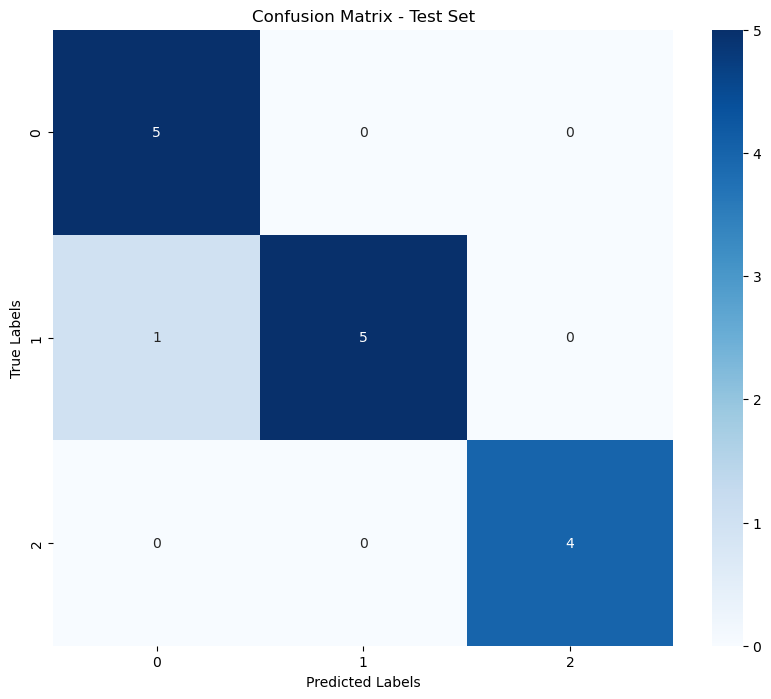

In [54]:
DIMENSION = 71
EPOCHS = 94
LEARNING_RATE = 0.001593
LEARNING_RATE_DECAY = 0.00012526
SIGMA = 20
SIGMA_DECAY = 0.0986
som_iris = SOM([28,28],iris_x_train, DIMENSION,EPOCHS,LEARNING_RATE,LEARNING_RATE_DECAY,SIGMA,SIGMA_DECAY, showMode=0)

label_map = createLabelMap(som_iris, iris_x_train, iris_y_train)

# Classify test data
predictions = classifySOM(som_iris, label_map, iris_x_train)


# Classify on training set
train_predictions = classifySOM(som_iris, label_map, iris_x_train)

# Classify on test set
test_predictions = classifySOM(som_iris, label_map, iris_x_test)

print("Classification Report for Test Set")
print(classification_report(iris_y_test, test_predictions))
plot_confusion_matrix(iris_y_test, test_predictions, title="Confusion Matrix - Test Set")

#### Breast cancer

In [ ]:
import optuna
from sklearn.metrics import classification_report

def objective(trial):
    # Suggest parameters
    DIMENSION = trial.suggest_int("DIMENSION", 100, 200)
    EPOCHS = trial.suggest_int("EPOCHS", 100, 300)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    LEARNING_RATE_DECAY = trial.suggest_float("LEARNING_RATE_DECAY", 1e-4, 1e-2, log = True)
    SIGMA = trial.suggest_int("SIGMA", 10, 25)
    SIGMA_DECAY = trial.suggest_float("SIGMA_DECAY", 1e-2, 1e-1, log=True)
    
    # Train SOM with suggested parameters
    som = SOM(
        [28, 28],
        cancer_x_train,
        DIMENSION,
        EPOCHS,
        LEARNING_RATE,
        LEARNING_RATE_DECAY,
        SIGMA,
        SIGMA_DECAY,
        showMode=0
    )
    
    label_map = createLabelMap(som, cancer_x_train, cancer_y_train)
    test_predictions = classifySOM(som, label_map, cancer_x_test)
    
    # Evaluate performance
    score = classification_report(cancer_y_test, test_predictions, output_dict=True)["accuracy"]
    return score

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-12-30 11:27:25,530] A new study created in memory with name: no-name-c842fde8-36af-4f58-8c3e-5776a7a3d21e
/var/folders/v6/pl0_dkns3pdd4gyq5whvz4nr0000gn/T/ipykernel_18392/2969257550.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  LEARNING_RATE = trial.suggest_loguniform("LEARNING_RATE", 1e-4, 1e-2)
/var/folders/v6/pl0_dkns3pdd4gyq5whvz4nr0000gn/T/ipykernel_18392/2969257550.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  LEARNING_RATE_DECAY = trial.suggest_loguniform("LEARNING_RATE_DECAY", 1e-4, 1e-2)
/var/folders/v6/pl0_dkns3pdd4gyq5whvz4nr0000gn/T/ipykernel_18392/2969257550.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

Best parameters: {'DIMENSION': 122, 'EPOCHS': 135, 'LEARNING_RATE': 0.00017099875329526444, 'LEARNING_RATE_DECAY': 0.000495519563354145, 'SIGMA': 21, 'SIGMA_DECAY': 0.07365565896056785}
Best accuracy: 0.9385964912280702


Best parameters: {'DIMENSION': 122, 'EPOCHS': 135, 'LEARNING_RATE': 0.00017099875329526444, 'LEARNING_RATE_DECAY': 0.000495519563354145, 'SIGMA': 21, 'SIGMA_DECAY': 0.07365565896056785}
Best accuracy: 0.9385964912280702

Training SOM: 100%|██████████| 135/135 [01:51<00:00,  1.21epoch/s]


Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



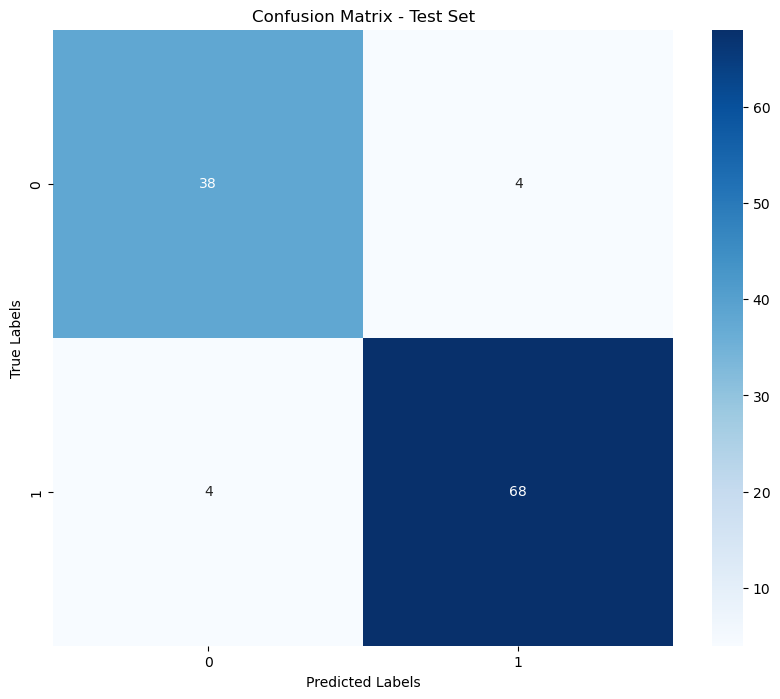

In [ ]:
DIMENSION = 122
EPOCHS = 135
LEARNING_RATE = 0.0001709
LEARNING_RATE_DECAY = 0.000495519563354145
SIGMA = 21
SIGMA_DECAY = 0.07365

cancer_som = SOM([28,28],cancer_x_train, DIMENSION,EPOCHS,LEARNING_RATE,LEARNING_RATE_DECAY,SIGMA,SIGMA_DECAY, showMode=0)

label_map = createLabelMap(cancer_som, cancer_x_train, cancer_y_train)


# Classify test data
predictions = classifySOM(cancer_som, label_map, cancer_x_train)


# Classify on training set
train_predictions = classifySOM(cancer_som, label_map, cancer_x_train)

# Classify on test set
test_predictions = classifySOM(cancer_som, label_map, cancer_x_test)

print("Classification Report for Test Set")
print(classification_report(cancer_y_test, test_predictions))
plot_confusion_matrix(cancer_y_test, test_predictions, title="Confusion Matrix - Test Set")

#### Wine

In [20]:
import optuna
from sklearn.metrics import classification_report

def objective(trial):
    # Suggest parameters
    DIMENSION = trial.suggest_int("DIMENSION", 70, 150)
    EPOCHS = trial.suggest_int("EPOCHS", 70, 200)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    LEARNING_RATE_DECAY = trial.suggest_float("LEARNING_RATE_DECAY", 1e-4, 1e-2, log = True)
    SIGMA = trial.suggest_int("SIGMA", 10, 25)
    SIGMA_DECAY = trial.suggest_float("SIGMA_DECAY", 1e-2, 1e-1, log=True)
    
    # Train SOM with suggested parameters
    som_wine = SOM(
        [28, 28],
        wine_x_train,
        DIMENSION,
        EPOCHS,
        LEARNING_RATE,
        LEARNING_RATE_DECAY,
        SIGMA,
        SIGMA_DECAY,
        showMode=0
    )
    
    label_map = createLabelMap(som_wine, wine_x_train, wine_y_train)
    test_predictions = classifySOM(som_wine, label_map, wine_x_test)
    
    # Evaluate performance
    score = classification_report(wine_y_test, test_predictions, output_dict=True)["accuracy"]
    return score

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-12-30 13:50:06,405] A new study created in memory with name: no-name-da73e42d-d5ba-410e-9e11-b0e6df8844f5
Training SOM: 100%|██████████| 175/175 [00:21<00:00,  8.23epoch/s]
[I 2024-12-30 13:50:27,787] Trial 0 finished with value: 0.5555555555555556 and parameters: {'DIMENSION': 102, 'EPOCHS': 175, 'LEARNING_RATE': 0.0032751137132232327, 'LEARNING_RATE_DECAY': 0.0011372401889566271, 'SIGMA': 25, 'SIGMA_DECAY': 0.09345348273343088}. Best is trial 0 with value: 0.5555555555555556.
Training SOM: 100%|██████████| 174/174 [00:18<00:00,  9.17epoch/s]
[I 2024-12-30 13:50:46,862] Trial 1 finished with value: 0.5833333333333334 and parameters: {'DIMENSION': 99, 'EPOCHS': 174, 'LEARNING_RATE': 0.0008578055764023521, 'LEARNING_RATE_DECAY': 0.0038772983076267383, 'SIGMA': 12, 'SIGMA_DECAY': 0.023583502616232894}. Best is trial 1 with value: 0.5833333333333334.
Training SOM: 100%|██████████| 155/155 [00:22<00:00,  6.77epoch/s]
[I 2024-12-30 13:51:09,891] Trial 2 finished with value: 0.638888

Best parameters: {'DIMENSION': 150, 'EPOCHS': 190, 'LEARNING_RATE': 0.00024145409895647447, 'LEARNING_RATE_DECAY': 0.00017608625358495866, 'SIGMA': 14, 'SIGMA_DECAY': 0.09344589365143731}
Best accuracy: 0.7777777777777778


Best parameters: {'DIMENSION': 150, 'EPOCHS': 190, 'LEARNING_RATE': 0.00024145409895647447, 'LEARNING_RATE_DECAY': 0.00017608625358495866, 'SIGMA': 14, 'SIGMA_DECAY': 0.09344589365143731}
Best accuracy: 0.7777777777777778

Training SOM: 100%|██████████| 190/190 [01:25<00:00,  2.21epoch/s]


Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.80      0.62      0.70        13
           2       0.58      0.78      0.67         9

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.76        36
weighted avg       0.80      0.78      0.78        36



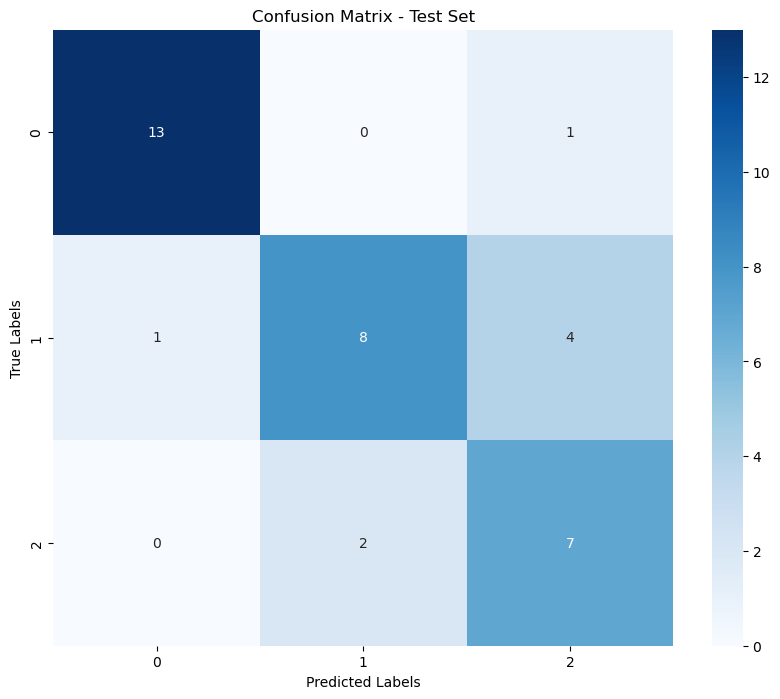

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
DIMENSION = 200
EPOCHS = 190
LEARNING_RATE = 0.00024145409895647447
LEARNING_RATE_DECAY = 0.00017608625358495866
SIGMA = 14
SIGMA_DECAY = 0.09344589365143731


som_wine = SOM([28,28],wine_x_train, DIMENSION,EPOCHS,LEARNING_RATE,LEARNING_RATE_DECAY,SIGMA,SIGMA_DECAY, showMode=0)

label_map = createLabelMap(som_wine, wine_x_train, wine_y_train)

# Classify test data
predictions = classifySOM(som_wine, label_map, wine_x_train)


# Classify on training set
train_predictions = classifySOM(som_wine, label_map, wine_x_train)

# Classify on test set
test_predictions = classifySOM(som_wine, label_map, wine_x_test)

print("Classification Report for Test Set")
print(classification_report(wine_y_test, test_predictions))
plot_confusion_matrix(wine_y_test, test_predictions, title="Confusion Matrix - Test Set")


#### Car eval

In [51]:
import optuna
from sklearn.metrics import classification_report

def objective(trial):
    # Suggest parameters
    DIMENSION = trial.suggest_int("DIMENSION", 50, 200)
    EPOCHS = trial.suggest_int("EPOCHS", 70, 200)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    LEARNING_RATE_DECAY = trial.suggest_float("LEARNING_RATE_DECAY", 1e-4, 1e-2, log = True)
    SIGMA = trial.suggest_int("SIGMA", 10, 25)
    SIGMA_DECAY = trial.suggest_float("SIGMA_DECAY", 1e-2, 1e-1, log=True)
    
    # Train SOM with suggested parameters
    som_car = SOM(
        [28, 28],
        car_x_train,
        DIMENSION,
        EPOCHS,
        LEARNING_RATE,
        LEARNING_RATE_DECAY,
        SIGMA,
        SIGMA_DECAY,
        showMode=0
    )
    
    label_map = createLabelMap(som_car, car_x_train, car_y_train)
    test_predictions = classifySOM(som_car, label_map, car_x_test)
    
    # Evaluate performance
    score = classification_report(car_y_test, test_predictions, output_dict=True)["accuracy"]
    return score

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-12-30 15:58:29,380] A new study created in memory with name: no-name-05489650-a9bf-4a36-a442-1ce8df4bca9d
Training SOM: 100%|██████████| 72/72 [03:39<00:00,  3.05s/epoch]
[I 2024-12-30 16:02:11,644] Trial 0 finished with value: 0.3988439306358382 and parameters: {'DIMENSION': 189, 'EPOCHS': 72, 'LEARNING_RATE': 0.0035247193115559763, 'LEARNING_RATE_DECAY': 0.0007642631280902845, 'SIGMA': 18, 'SIGMA_DECAY': 0.026228520538181296}. Best is trial 0 with value: 0.3988439306358382.
Training SOM: 100%|██████████| 106/106 [04:51<00:00,  2.75s/epoch]
[I 2024-12-30 16:07:04,942] Trial 1 finished with value: 0.6763005780346821 and parameters: {'DIMENSION': 189, 'EPOCHS': 106, 'LEARNING_RATE': 0.00885418754725835, 'LEARNING_RATE_DECAY': 0.0011866252987578233, 'SIGMA': 16, 'SIGMA_DECAY': 0.0692903250766259}. Best is trial 1 with value: 0.6763005780346821.
Training SOM: 100%|██████████| 130/130 [03:22<00:00,  1.56s/epoch]
[I 2024-12-30 16:10:28,994] Trial 2 finished with value: 0.62716763005

Best parameters: {'DIMENSION': 110, 'EPOCHS': 111, 'LEARNING_RATE': 0.009547280780622459, 'LEARNING_RATE_DECAY': 0.009444201386650192, 'SIGMA': 19, 'SIGMA_DECAY': 0.05825968779232311}
Best accuracy: 0.7225433526011561


Best parameters: {'DIMENSION': 110, 'EPOCHS': 111, 'LEARNING_RATE': 0.009547280780622459, 'LEARNING_RATE_DECAY': 0.009444201386650192, 'SIGMA': 19, 'SIGMA_DECAY': 0.05825968779232311}
Best accuracy: 0.7225433526011561

Training SOM: 100%|██████████| 111/111 [01:48<00:00,  1.03epoch/s]


Classification Report for Test Set
              precision    recall  f1-score   support

           0       0.34      0.59      0.43        59
           1       0.40      0.57      0.47        14
           2       0.92      0.75      0.82       260
           3       0.55      0.46      0.50        13

    accuracy                           0.70       346
   macro avg       0.55      0.59      0.56       346
weighted avg       0.78      0.70      0.73       346



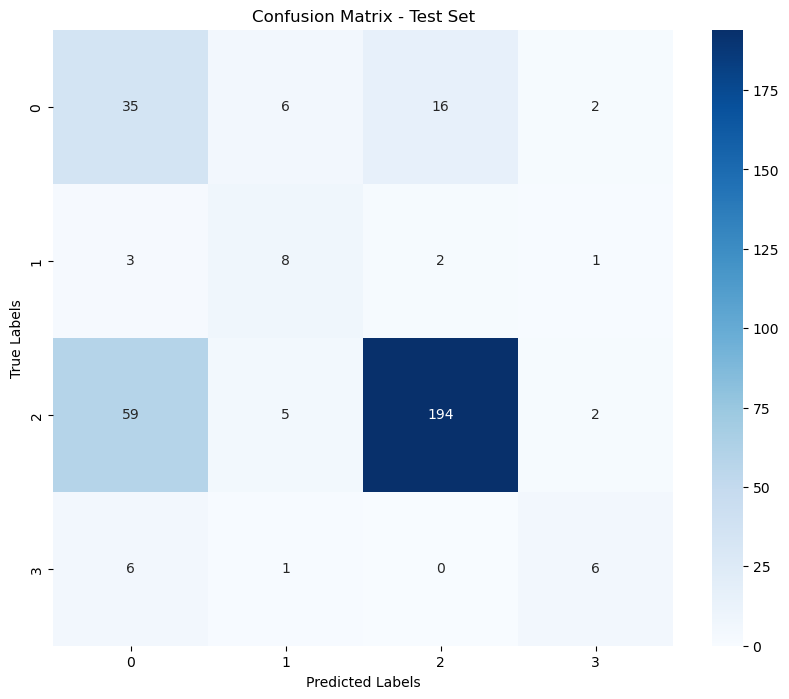

In [54]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
DIMENSION = 110
EPOCHS = 111
LEARNING_RATE = 0.009547280780622459
LEARNING_RATE_DECAY = 0.009444201386650192
SIGMA = 19
SIGMA_DECAY = 0.05825968779232311


som_car = SOM([28,28],car_x_train, DIMENSION,EPOCHS,LEARNING_RATE,LEARNING_RATE_DECAY,SIGMA,SIGMA_DECAY, showMode=0)

label_map = createLabelMap(som_car, car_x_train, car_y_train)

# Classify test data
predictions = classifySOM(som_car, label_map, car_x_train)

# Classify on test set
test_predictions = classifySOM(som_car, label_map, car_x_test)

print("Classification Report for Test Set")
print(classification_report(car_y_test, test_predictions))
plot_confusion_matrix(car_y_test, test_predictions, title="Confusion Matrix - Test Set")


#### Arrythmia

In [97]:
import optuna
from sklearn.metrics import classification_report

def objective(trial):
    # Suggest parameters
    DIMENSION = trial.suggest_int("DIMENSION", 70, 150)
    EPOCHS = trial.suggest_int("EPOCHS", 70, 200)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    LEARNING_RATE_DECAY = trial.suggest_float("LEARNING_RATE_DECAY", 1e-4, 1e-2, log = True)
    SIGMA = trial.suggest_int("SIGMA", 10, 25)
    SIGMA_DECAY = trial.suggest_float("SIGMA_DECAY", 1e-2, 1e-1, log=True)
    
    # Train SOM with suggested parameters
    som_arr = SOM(
        [28, 28],
        arr_x_train,
        DIMENSION,
        EPOCHS,
        LEARNING_RATE,
        LEARNING_RATE_DECAY,
        SIGMA,
        SIGMA_DECAY,
        showMode=0
    )
    
    label_map = createLabelMap(som_arr, arr_x_train, arr_y_train)
    test_predictions = classifySOM(som_arr, label_map, arr_x_test)
    
    # Evaluate performance
    score = classification_report(arr_y_test, test_predictions, output_dict=True)["accuracy"]
    return score

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-12-30 18:25:19,908] A new study created in memory with name: no-name-da835d14-9907-4c86-89b9-8a11ae99c6f0
Training SOM: 100%|██████████| 152/152 [22:00<00:00,  8.69s/epoch]
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pred

KeyboardInterrupt: 

In [104]:
study.best_value

0.01098901098901099

In [ ]:
study.best_params

{'DIMENSION': 146,
 'EPOCHS': 152,
 'LEARNING_RATE': 0.0002667112104851474,
 'LEARNING_RATE_DECAY': 0.00046451240879922834,
 'SIGMA': 14,
 'SIGMA_DECAY': 0.08521120756753868}

Training SOM: 100%|██████████| 100/100 [1:52:11<00:00, 67.32s/epoch]


Classification Report for Test Set
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.01      1.00      0.02         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.01        91
   macro avg       0.00      0.09      0.00        91
weighted avg       0.00      0.01      0.00        91



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


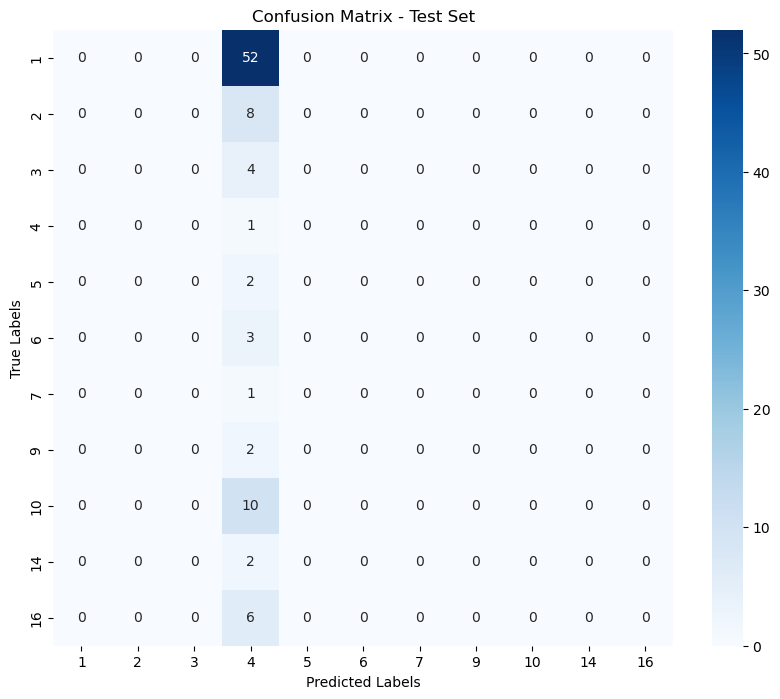

In [16]:
DIMENSION = 300
EPOCHS = 100
LEARNING_RATE = 0.005
LEARNING_RATE_DECAY = 0.03
SIGMA = 25
SIGMA_DECAY = 0.0852
som_arr = SOM([28,28],arr_x_train, DIMENSION,EPOCHS,LEARNING_RATE,LEARNING_RATE_DECAY,SIGMA,SIGMA_DECAY, showMode=0)
from sklearn.metrics import classification_report
label_map = createLabelMap(som_arr, arr_x_train, arr_y_train)

# Classify on test set
test_predictions = classifySOM(som_arr, label_map, arr_x_test)

print("Classification Report for Test Set")
print(classification_report(arr_y_test, test_predictions))
plot_confusion_matrix(arr_y_test, test_predictions, title="Confusion Matrix - Test Set")

### Using smote

In [ ]:
import optuna
from sklearn.metrics import classification_report

def objective(trial):
    # Suggest parameters
    DIMENSION = trial.suggest_int("DIMENSION", 70, 150)
    EPOCHS = trial.suggest_int("EPOCHS", 70, 200)
    LEARNING_RATE = trial.suggest_float("LEARNING_RATE", 1e-4, 1e-2, log = True)
    LEARNING_RATE_DECAY = trial.suggest_float("LEARNING_RATE_DECAY", 1e-4, 1e-2, log = True)
    SIGMA = trial.suggest_int("SIGMA", 10, 25)
    SIGMA_DECAY = trial.suggest_float("SIGMA_DECAY", 1e-2, 1e-1, log=True)
    
    # Train SOM with suggested parameters
    som_arr = SOM(
        [28, 28],
        arr_x_train_smote,
        DIMENSION,
        EPOCHS,
        LEARNING_RATE,
        LEARNING_RATE_DECAY,
        SIGMA,
        SIGMA_DECAY,
        showMode=0
    )
    
    label_map = createLabelMap(som_arr, arr_x_train_smote, arr_y_train_smote)
    test_predictions = classifySOM(som_arr, label_map, arr_x_test)
    
    # Evaluate performance
    score = classification_report(arr_y_test, test_predictions, output_dict=True)["accuracy"]
    return score

# Run Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-01-07 12:01:07,766] A new study created in memory with name: no-name-e058b38a-2967-4a5e-b3f8-21b2aa358d57
Training SOM:   0%|          | 0/102 [00:00<?, ?epoch/s]

In [42]:
DIMENSION = 100
EPOCHS = 50
LEARNING_RATE = 0.005
LEARNING_RATE_DECAY = 0.03
SIGMA = 25
SIGMA_DECAY = 0.0852
#som_arr = SOM([28,28],arr_x_train_smote, DIMENSION,EPOCHS,LEARNING_RATE,LEARNING_RATE_DECAY,SIGMA,SIGMA_DECAY, showMode=0)
from sklearn.metrics import classification_report
label_map = createLabelMap(som_arr, arr_x_train_smote, arr_y_train_smote)

# Classify on test set
test_predictions = classifySOM(som_arr, label_map, arr_x_test)

print("Classification Report for Test Set")
print(classification_report(arr_y_test, test_predictions))
plot_confusion_matrix(arr_y_test, test_predictions, title="Confusion Matrix - Arrythmia SMOTE")

KeyboardInterrupt: 